# Evaluate dimensionality reduction hyperparameters (algorithm, n dimensions)

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
def figsize(w,h):
    plt.rcParams['figure.figsize']=[w,h]
figsize(15,5) #for big visuals
%config InlineBackend.figure_format = 'retina'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# gil sans
plt.rcParams['font.sans-serif'] = 'Gill Sans'


In [ ]:
dim_red_performance = pd.read_csv(
    "../../results/dimemsionality_reduction_val_performance.csv"
)
dim_red_performance.reduction_algorithm.fillna("None", inplace=True)
dim_red_performance["ndim"].fillna(512, inplace=True)

/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_9232/2432217069.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dim_red_performance.reduction_algorithm.fillna('None',inplace=True)
/var/folders/d8/265wdp1n0bn_r85dh3pp95fh0000gq/T/ipykernel_9232/2432217069.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [ ]:
dim_red_performance.groupby(["reduction_algorithm", "ndim"]).mean().round(2)

ari   nmi   fmi  homogeneity  completeness  \
reduction_algorithm ndim                                                 
None                512.0  0.71  0.88  0.75         0.84          0.92   
tsne                2.0    0.94  0.94  0.94         0.97          0.91   
                    3.0    0.93  0.94  0.94         0.97          0.91   
umap                2.0    0.88  0.90  0.88         0.96          0.85   
                    3.0    0.92  0.92  0.92         0.96          0.88   
                    5.0    0.93  0.93  0.93         0.97          0.89   
                    10.0   0.93  0.93  0.93         0.96          0.90   
                    20.0   0.93  0.94  0.93         0.96          0.91   
                    30.0   0.94  0.94  0.94         0.96          0.92   

                           v_measure  purity  accuracy  
reduction_algorithm ndim                                
None                512.0       0.88    0.76      0.75  
tsne                2.0         0.94    0.97      0.89  
                    3.0         0.94    0.97      0.89  
umap                2.0         0.90    0.96      0.79  
                    3.0         0.92    0.97      0.84  
                    5.0         0.93    0.97      0.85  
                    10.0        0.93    0.97      0.87  
                    20.0        0.94    0.96      0.87  
                    30.0        0.94    0.97      0.89

In [ ]:
dim_red_performance.groupby(["reduction_algorithm", "ndim"]).std().round(3)

ari    nmi    fmi  homogeneity  completeness  \
reduction_algorithm ndim                                                    
None                512.0  0.000  0.000  0.000        0.000         0.000   
tsne                2.0    0.003  0.005  0.003        0.001         0.010   
                    3.0    0.004  0.003  0.004        0.002         0.004   
umap                2.0    0.057  0.020  0.052        0.008         0.029   
                    3.0    0.009  0.007  0.009        0.004         0.011   
                    5.0    0.006  0.006  0.005        0.004         0.009   
                    10.0   0.005  0.005  0.005        0.003         0.008   
                    20.0   0.020  0.006  0.018        0.007         0.008   
                    30.0   0.008  0.009  0.008        0.004         0.018   

                           v_measure  purity  accuracy  
reduction_algorithm ndim                                
None                512.0      0.000   0.000     0.000  
tsne                2.0        0.005   0.003     0.007  
                    3.0        0.003   0.002     0.005  
umap                2.0        0.020   0.007     0.038  
                    3.0        0.007   0.004     0.017  
                    5.0        0.006   0.004     0.013  
                    10.0       0.005   0.004     0.013  
                    20.0       0.006   0.016     0.022  
                    30.0       0.009   0.005     0.020

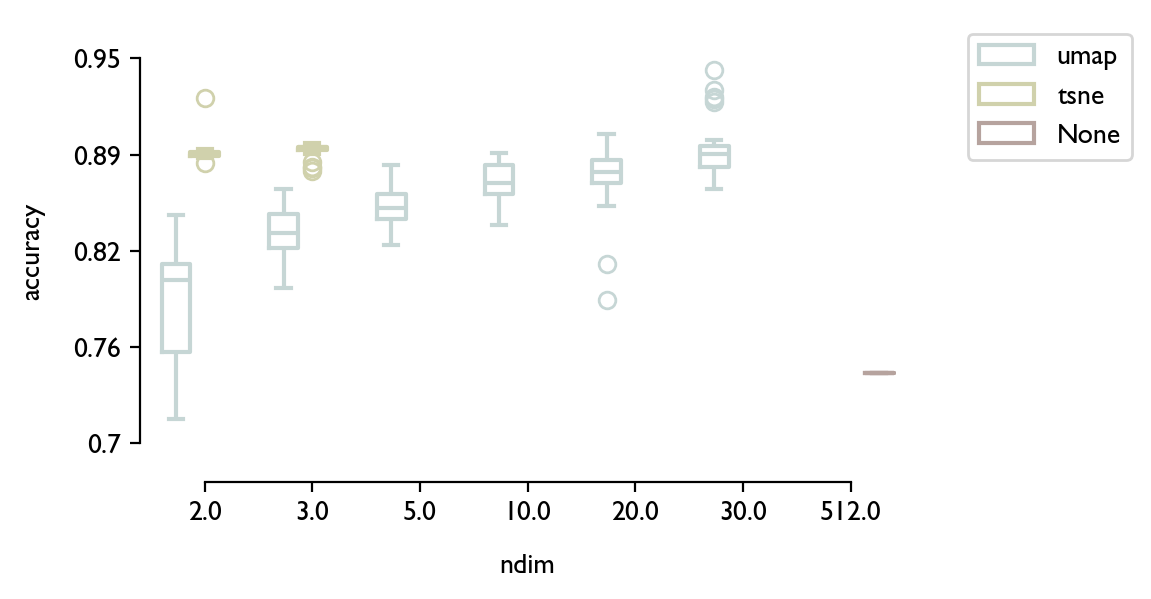

In [ ]:
import seaborn as sns

figsize(5, 3)
fig, ax = plt.subplots(1, 1, sharey=True)

sns.set_palette(["#C6D6D5", "#D0D1AC", "#B6A39E", "#948B89", "#726E75"])

# Create the FacetGrid
# sns.relplot(data=stats, x="ndim", y="accuracy", hue="reduction_algorithm", kind="scatter", col="split")

# g = sns.FacetGrid(dim_red_performance, col="split",palette=palette)#, height=4, aspect=1)
# g.map_dataframe(sns.boxplot, x="ndim", y="accuracy", hue="reduction_algorithm",palette=palette)#, dodge=True)
sns.boxplot(
    data=dim_red_performance,
    x="ndim",
    y="accuracy",
    hue="reduction_algorithm",
    dodge=True,
    ax=ax,
    fill=False,
)  # ,linecolor="reduction_algorithm")
plt.legend()
# Map boxplots to each facet
# Rotate x-axis labels
# for ax in g.axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)
#     ax.legend()
# pass

import tuftelike

tuftelike.adjust(
    [str(x) for x in dim_red_performance["ndim"].unique()], [0.7, 0.95], ax=ax
)

# put legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")


plt.savefig("../../figures/validation_set_clustering_performance.pdf")